###1. Explore Latitude and Longitude Coordinates

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point


In [13]:
# Load your dataset
df = pd.read_csv('/content/Dataset .csv')


In [14]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [15]:
# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)


<ipython-input-16-b3a6b5037406>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


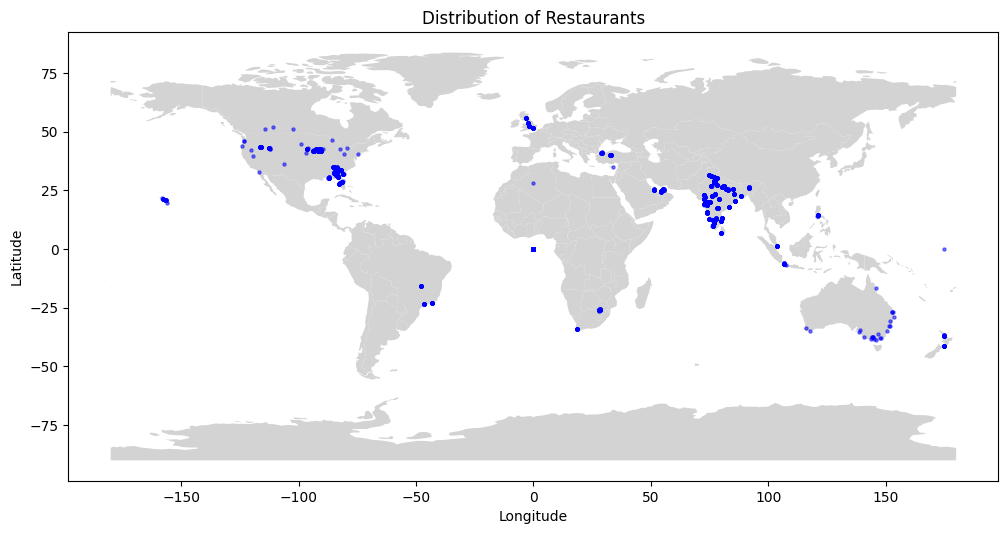

In [16]:
# Plot the distribution of restaurants
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, color='blue', markersize=5, alpha=0.5)
plt.title('Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


###2. Group Restaurants by City or Locality


In [17]:
# Group by city or locality and count restaurants
grouped = df.groupby('City').size().reset_index(name='Restaurant Count')
print(grouped.head())


        City  Restaurant Count
0  Abu Dhabi                20
1       Agra                20
2  Ahmedabad                21
3     Albany                20
4  Allahabad                20


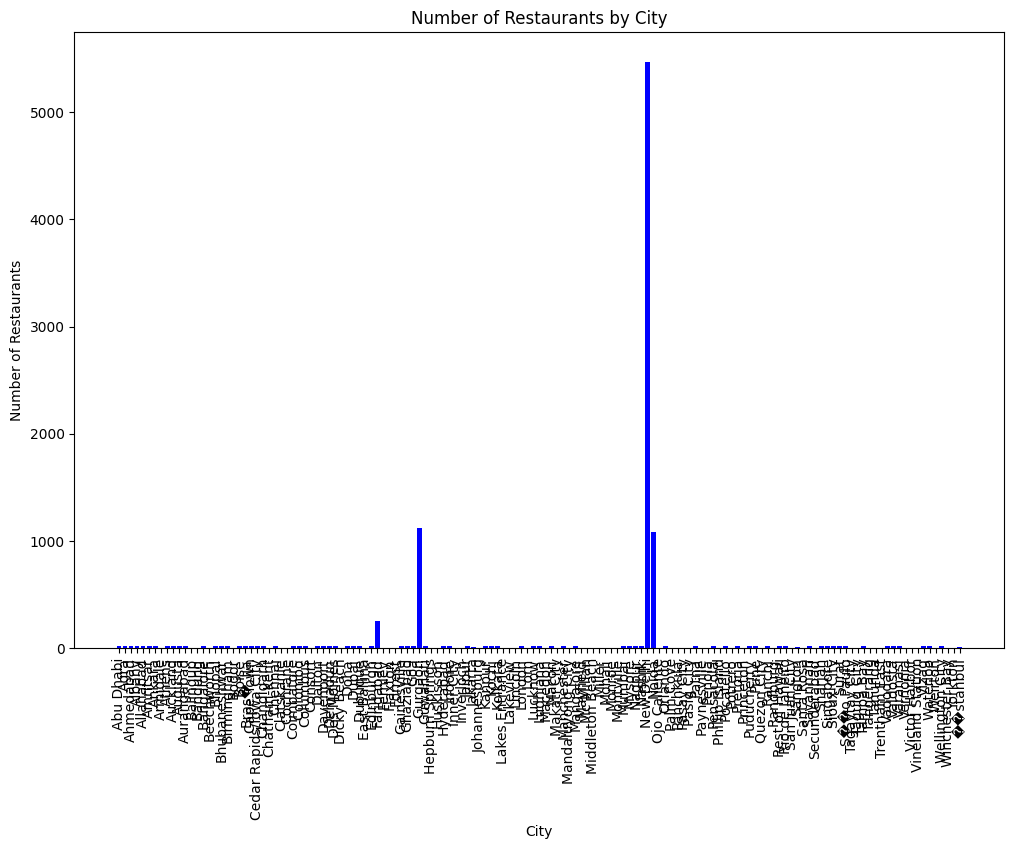

In [18]:
# Plot concentration of restaurants by city
plt.figure(figsize=(12, 8))
plt.bar(grouped['City'], grouped['Restaurant Count'], color='blue')
plt.xticks(rotation=90)
plt.title('Number of Restaurants by City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()


###3. Calculate Statistics by City or Locality

In [19]:
# Calculate average ratings by city
avg_ratings = df.groupby('City')['Aggregate rating'].mean().reset_index()
avg_ratings.columns = ['City', 'Average Rating']
print(avg_ratings.head())


        City  Average Rating
0  Abu Dhabi        4.300000
1       Agra        3.965000
2  Ahmedabad        4.161905
3     Albany        3.555000
4  Allahabad        3.395000


In [20]:
# Count types of cuisines by city
cuisines_count = df.groupby('City')['Cuisines'].value_counts().unstack().fillna(0)
print(cuisines_count.head())


Cuisines   Afghani  Afghani, Mughlai, Chinese  Afghani, North Indian  \
City                                                                   
Abu Dhabi      0.0                        0.0                    0.0   
Agra           0.0                        0.0                    0.0   
Ahmedabad      0.0                        0.0                    0.0   
Albany         0.0                        0.0                    0.0   
Allahabad      0.0                        0.0                    0.0   

Cuisines   Afghani, North Indian, Pakistani, Arabian  African  \
City                                                            
Abu Dhabi                                        0.0      0.0   
Agra                                             0.0      0.0   
Ahmedabad                                        0.0      0.0   
Albany                                           0.0      0.0   
Allahabad                                        0.0      0.0   

Cuisines   African, Portuguese  America

In [21]:
# Calculate average price range by city
avg_price = df.groupby('City')['Average Cost for two'].mean().reset_index()
avg_price.columns = ['City', 'Average Price']
print(avg_price.head())


        City  Average Price
0  Abu Dhabi     182.000000
1       Agra    1065.000000
2  Ahmedabad     857.142857
3     Albany      19.750000
4  Allahabad     517.500000


###4. Identify Insights and Patterns

In [22]:
# Merge the calculated statistics for analysis
analysis_df = avg_ratings.merge(avg_price, on='City')
analysis_df = analysis_df.sort_values(by='Average Rating', ascending=False)
print(analysis_df.head())


                 City  Average Rating  Average Price
56         Inner City        4.900000    1120.000000
107       Quezon City        4.800000     800.000000
73        Makati City        4.650000    1150.000000
95         Pasig City        4.633333     933.333333
75   Mandaluyong City        4.625000    2000.000000


In [23]:
# Print or visualize interesting insights
print("Cities with the highest average ratings:")
print(analysis_df.head())

print("Cities with the highest average price ranges:")
print(avg_price.sort_values(by='Average Price', ascending=False).head())


Cities with the highest average ratings:
                 City  Average Rating  Average Price
56         Inner City        4.900000    1120.000000
107       Quezon City        4.800000     800.000000
73        Makati City        4.650000    1150.000000
95         Pasig City        4.633333     933.333333
75   Mandaluyong City        4.625000    2000.000000
Cities with the highest average price ranges:
           City  Average Price
59      Jakarta  308437.500000
125   Tangerang  250000.000000
19        Bogor  160000.000000
13      Bandung  150000.000000
94   Pasay City    3333.333333
